#Imports and pip

In [ ]:
! pip install xgboost

In [ ]:
import pandas as pd

##Drive mounting

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to where your dataset is located
%cd '/content/drive/My Drive/'

df = pd.read_csv('Bank Account Fraud.csv')

/content/drive/My Drive


The provided dataset consists of 32 columns, including features such as income, name_email_similarity, and various other parameters. The target variable fraud_bool indicates whether a transaction is fraudulent (0 for non-fraudulent, 1 for fraudulent).

In [ ]:
df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...                0   
1               -0.849551           AD          1658  ...                0   
2               -1.490386           AB          1095  ...                0   
3               -1.863101           AB          3483  ...                0   
4               47.152498           AA          2339  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                   1500                0  INTERNET   
1                   1500                0  INTERNET   
2                    200                0  INTERNET   
3                    200                0  INTERNET   
4                    200                0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                   1   
1                   3.363854     other                   1   
2                  22.730559   windows                   0   
3                  15.215816     linux                   1   
4                   3.743048     other                   0   

   device_distinct_emails_8w device_fraud_count  month  
0                          1                  0      0  
1                          1                  0      0  
2                          1                  0      0  
3                          1                  0      0  
4                          1                  0      0  

[5 rows x 32 columns]

###Analyze the target variable (fraud_bool) to understand its distribution and imbalance. Plotting a histogram or bar chart of the target variable will show the class distribution

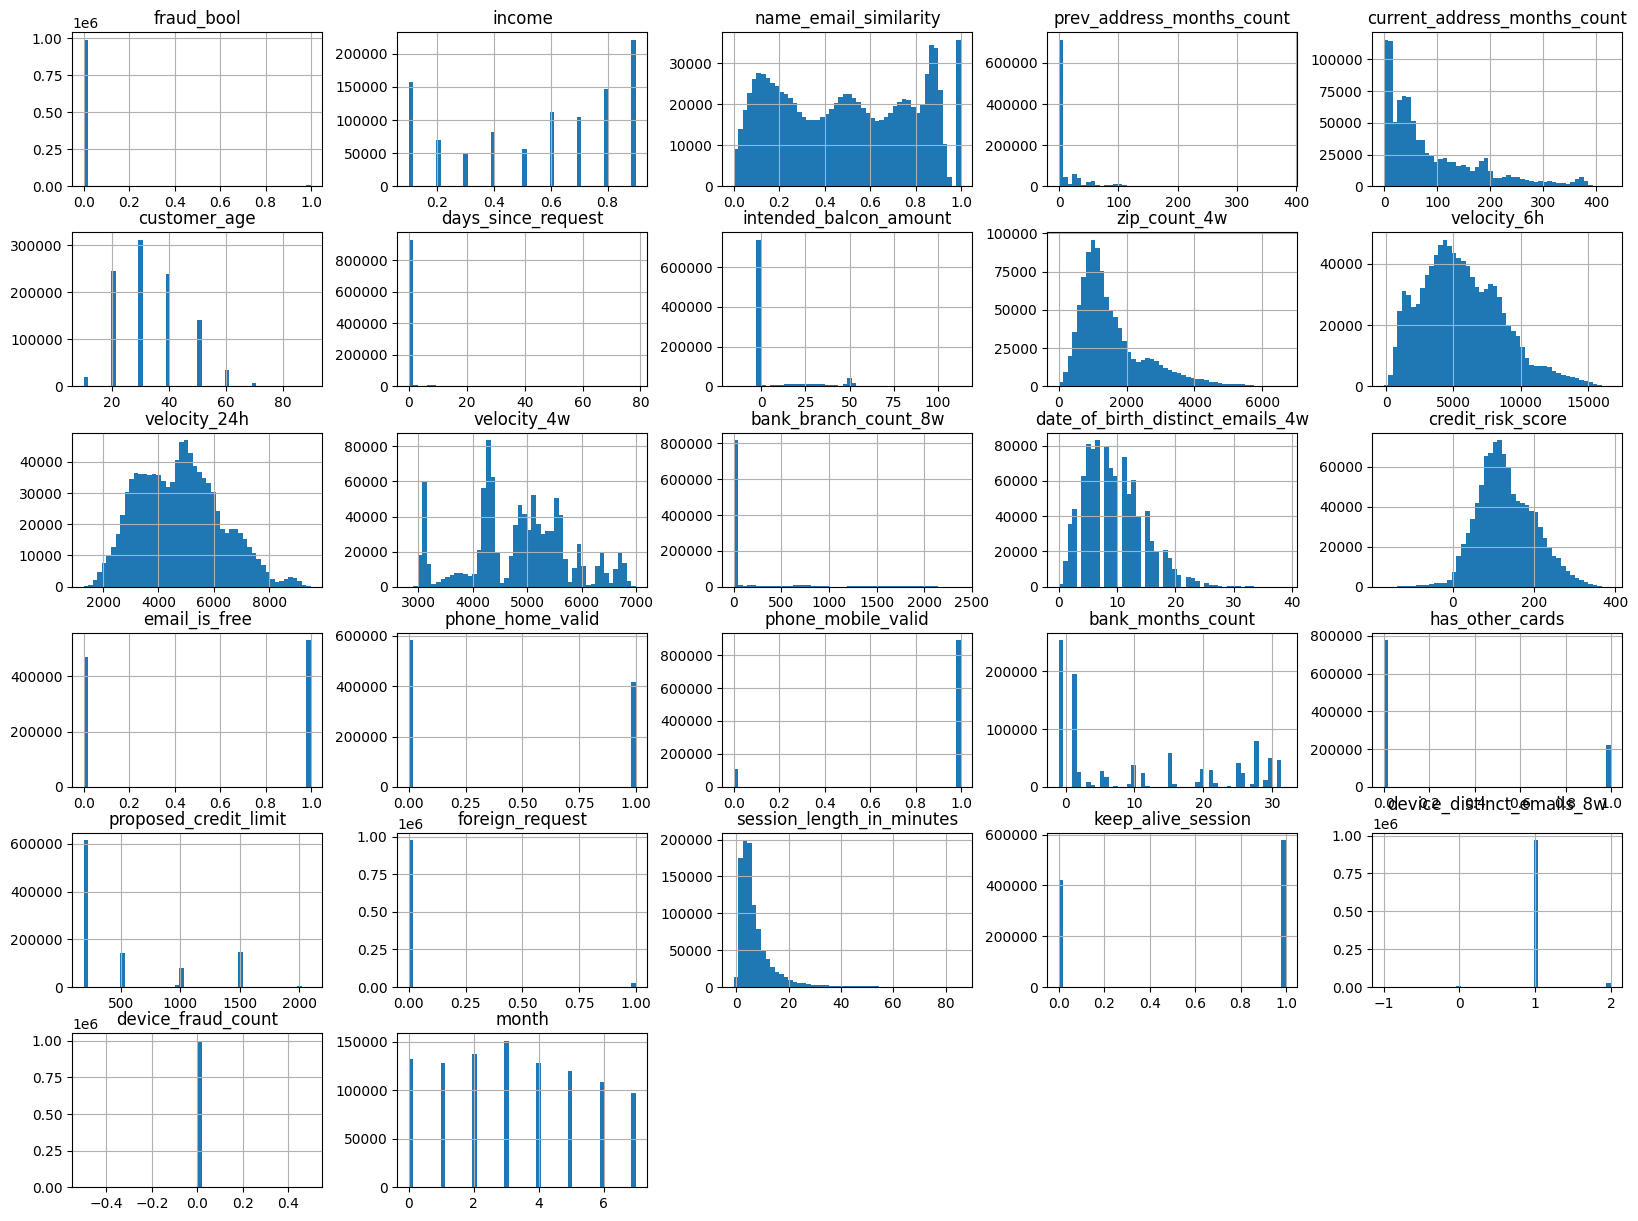

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.040000e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565400  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

##Handling Missing Values

###Identify Missing Values in Each Column

##Descriptive Analysis

# ##Random Forest Handling Missing Values - Imputer

In [ ]:
# Filling missing values for 'keep_alive_session' with mode imputer
mode_value = df['keep_alive_session'].mode()[0]
df['keep_alive_session'].fillna(mode_value, inplace=True)

# Specify the attributes for which you want to perform median imputation
attributes_to_impute = ['device_fraud_count', 'month', 'credit_risk_score']

# Convert the dataframe to numeric to avoid 'NAType' error
df[attributes_to_impute] = df[attributes_to_impute].apply(pd.to_numeric, errors='coerce')

# Initialize the SimpleImputer with 'median' strategy
imputer = SimpleImputer(strategy='median')

# Iterate through each attribute and perform median imputation
for attribute in attributes_to_impute:
    df[attribute] = imputer.fit_transform(df[[attribute]])

# Verify that missing values have been filled
print("Number of missing values after imputation:")
print(df[attributes_to_impute].isnull().sum())

m = df.isnull().sum()
print(m)

Number of missing values after imputation:
device_fraud_count    0
month                 0
credit_risk_score     0
dtype: int64
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     

# ANN Implementation for Fraud Detection with 20 Epochs on Entire Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Handle missing values
# For numerical features, impute with median
numeric_features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
                    'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                    'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
                    'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
                    'session_length_in_minutes', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

numeric_imputer = SimpleImputer(strategy='median')
X_numeric_imputed = numeric_imputer.fit_transform(df[numeric_features])

# For categorical features, impute with mode and encode them using one-hot encoding
categorical_features = ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid',
                        'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'device_os', 'keep_alive_session']

categorical_imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = categorical_imputer.fit_transform(df[categorical_features])

# One-hot encoding for categorical features
encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical_imputed)

# Combine numerical and categorical features
X_imputed = pd.concat([pd.DataFrame(X_numeric_imputed, columns=numeric_features),
                       pd.DataFrame(X_categorical_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))],
                      axis=1)

# Address imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, df['fraud_bool'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define class weights (adjust based on your data)
class_weight = {0: 1, 1: 5}  # Class 1 (fraud) has higher weight

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping], class_weight=class_weight)

Epoch 1/20
49449/49449 [==============================] - 215s 4ms/step - loss: 0.4742 - accuracy: 0.8685 - val_loss: 0.1933 - val_accuracy: 0.9144
Epoch 2/20
49449/49449 [==============================] - 216s 4ms/step - loss: 0.3579 - accuracy: 0.9048 - val_loss: 0.1519 - val_accuracy: 0.9369
Epoch 3/20
49449/49449 [==============================] - 226s 5ms/step - loss: 0.3293 - accuracy: 0.9138 - val_loss: 0.1574 - val_accuracy: 0.9337
Epoch 4/20
49449/49449 [==============================] - 225s 5ms/step - loss: 0.3133 - accuracy: 0.9186 - val_loss: 0.1446 - val_accuracy: 0.9377
Epoch 5/20
49449/49449 [==============================] - 203s 4ms/step - loss: 0.3017 - accuracy: 0.9223 - val_loss: 0.1481 - val_accuracy: 0.9390
Epoch 6/20
49449/49449 [==============================] - 222s 4ms/step - loss: 0.2923 - accuracy: 0.9247 - val_loss: 0.1436 - val_accuracy: 0.9393
Epoch 7/20
49449/49449 [==============================] - 202s 4ms/step - loss: 0.2853 - accuracy: 0.9272 - val_

In [ ]:
# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Threshold for fraud classification

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_class, average='binary')
auc_roc = roc_auc_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('AUC-ROC:', auc_roc)

12363/12363 [==============================] - 19s 2ms/step
Precision: 0.9132743113581313
Recall: 0.9835347050199686
F1 Score: 0.9471032377725526
AUC-ROC: 0.9947119846809798


## ANN with Focal Loss Hyperparameter with 8 Epochs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Loss
import tensorflow as tf
import keras.backend as K

# Define custom focal loss function
class BinaryFocalLoss(Loss):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(BinaryFocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def call(self, y_true, y_pred):
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)

        # Clip the prediction value to prevent NaNs in logarithm
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

        # Calculate focal loss
        loss = -self.alpha * y_true * K.pow(1.0 - y_pred, self.gamma) * K.log(y_pred) \
               - (1.0 - self.alpha) * (1.0 - y_true) * K.pow(y_pred, self.gamma) * K.log(1.0 - y_pred)

        return K.mean(loss, axis=-1)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with focal loss
focal_loss = BinaryFocalLoss(alpha=0.25, gamma=2)  # Adjust alpha and gamma as needed
model.compile(loss=focal_loss, optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/8
49449/49449 [==============================] - 225s 4ms/step - loss: 0.0223 - accuracy: 0.9028 - val_loss: 0.0140 - val_accuracy: 0.9310
Epoch 2/8
49449/49449 [==============================] - 220s 4ms/step - loss: 0.0163 - accuracy: 0.9309 - val_loss: 0.0127 - val_accuracy: 0.9427
Epoch 3/8
49449/49449 [==============================] - 230s 5ms/step - loss: 0.0150 - accuracy: 0.9372 - val_loss: 0.0128 - val_accuracy: 0.9344
Epoch 4/8
49449/49449 [==============================] - 234s 5ms/step - loss: 0.0142 - accuracy: 0.9410 - val_loss: 0.0115 - val_accuracy: 0.9475
Epoch 5/8
49449/49449 [==============================] - 214s 4ms/step - loss: 0.0136 - accuracy: 0.9437 - val_loss: 0.0113 - val_accuracy: 0.9473
Epoch 6/8
49449/49449 [==============================] - 236s 5ms/step - loss: 0.0132 - accuracy: 0.9456 - val_loss: 0.0113 - val_accuracy: 0.9468
Epoch 7/8
49449/49449 [==============================] - 220s 4ms/step - loss: 0.0129 - accuracy: 0.9475 - val_loss: 0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define features and target variable
features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
            'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w',
            'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free',
            'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
            'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'device_os',
            'keep_alive_session', 'device_distinct_emails', 'device_fraud_count', 'month']

target = 'fraud_bool'

# Define the target encoder
encoder = TargetEncoder()

# Define the RandomForestClassifier
classifier = RandomForestClassifier()

# Create a pipeline with target encoding, imputation, and classification
pipeline = make_pipeline(encoder, SimpleImputer(strategy='median'), classifier)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, df[features], df[target], cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

NameError: name 'TargetEncoder' is not defined